In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('../data/salary_data.csv')


In [9]:
df

,YearsExperience,Salary
0,7.5,88965
1,19.0,183622
2,14.6,146945
3,12.0,119942
4,3.1,60677
...,...,...
145,0.7,39775
146,12.2,122896
147,10.1,110131
148,1.0,22030


In [10]:
df.corr()["Salary"]

YearsExperience    0.994226
Salary             1.000000
Name: Salary, dtype: float64

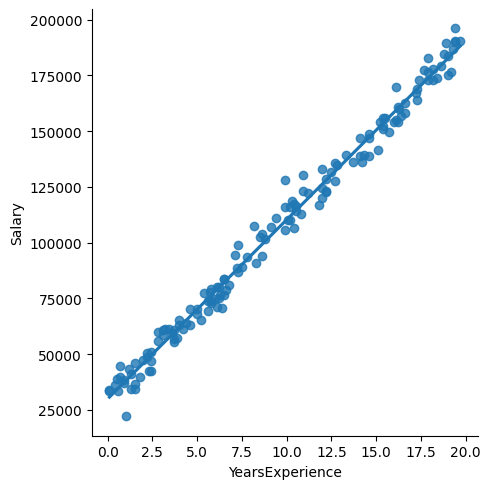

In [11]:
import seaborn as sns
sns.lmplot(x='YearsExperience', y='Salary', data=df, fit_reg=True, ci=None)

<Axes: ylabel='Frequency'>

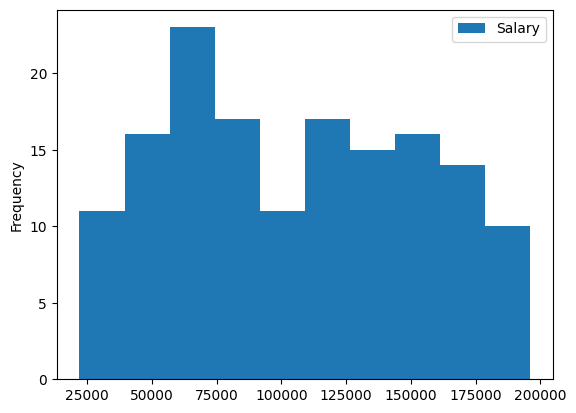

In [12]:
df.plot.hist(y='Salary')

In [13]:
train_dataset = df.sample(frac=0.8, random_state=42).copy()
test_dataset = df.drop(train_dataset.index).copy()

In [14]:
train_dataset.shape

(120, 2)

In [15]:
test_dataset.shape

(30, 2)

In [16]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [17]:
predictors = ['YearsExperience']
target = 'Salary'

In [18]:
reg.fit(train_dataset[predictors], train_dataset['Salary'])

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [19]:
predictions = reg.predict(test_dataset[predictors])

In [20]:
predictions

array([182966.20874388,  58812.39690701, 128145.04507565,  52362.84824016,
        45913.2995733 , 109602.59265846, 117664.52849202, 181353.82157717,
        61230.97765708,  37045.17015639,  62037.17124043, 143462.72315942,
       132982.20657579, 172485.69216025,  49138.07390673, 145075.11032613,
       152330.85257634,  47525.68674002,  80579.62365763, 112021.17340852,
        95897.3017414 , 151524.65899298, 159586.59482655, 174098.07932696,
        66874.33274057, 112021.17340852,  96703.49532475, 184578.59591059,
        75742.46215749,  74936.26857413])

In [21]:
test_dataset["predictions"] = predictions

In [22]:
test_dataset

,YearsExperience,Salary,predictions
1,19.0,183622,182966.208744
14,3.6,59590,58812.396907
20,12.2,123299,128145.045076
21,2.8,60069,52362.848240
37,2.0,47360,45913.299573
41,9.9,105657,109602.592658
48,10.9,123267,117664.528492
52,18.8,184430,181353.821577
57,3.9,57278,61230.977657
58,0.9,36851,37045.170156


In [23]:
test_dataset["predictions"] = test_dataset["predictions"].round()

In [24]:
test_dataset

,YearsExperience,Salary,predictions
1,19.0,183622,182966.0
14,3.6,59590,58812.0
20,12.2,123299,128145.0
21,2.8,60069,52363.0
37,2.0,47360,45913.0
41,9.9,105657,109603.0
48,10.9,123267,117665.0
52,18.8,184430,181354.0
57,3.9,57278,61231.0
58,0.9,36851,37045.0


In [26]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(test_dataset['Salary'], test_dataset['predictions'])

In [27]:
error

4270.166666666667

In [28]:
df.describe()["Salary"]

count       150.000000
mean     105896.220000
std       47981.691088
min       22030.000000
25%       63337.000000
50%      106179.500000
75%      148162.500000
max      196138.000000
Name: Salary, dtype: float64

In [29]:
errors =(test_dataset['Salary'] - test_dataset['predictions']).abs()

In [30]:
errors

1        656.0
14       778.0
20      4846.0
21      7706.0
37      1447.0
41      3946.0
48      5602.0
52      3076.0
57      3953.0
58       194.0
71      3328.0
74      4600.0
87      1831.0
88      4883.0
90      6891.0
91      5645.0
92      1970.0
99      2994.0
102     4147.0
103     1834.0
106    11338.0
107     9973.0
116     4651.0
121     2446.0
124     3713.0
129     4027.0
130     5919.0
140     8184.0
144     2052.0
149     5475.0
dtype: float64

In [31]:
from sklearn.metrics import r2_score
r2 = r2_score(test_dataset['Salary'], test_dataset['predictions'])

print(f"R² Score: {r2:.4f}")

R² Score: 0.9885


In [34]:
new_data = pd.DataFrame({'YearsExperience': [5.5]})
predicted_salary = reg.predict(new_data)
predicted_salary.round()

array([74130.])